# Naïve implemetation of a dense NN

In [26]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
from keras.datasets import mnist

In [154]:
def load_data():
    '''Returns properly-shaped data from the MNIST builtin dataset
    ''' 
    # 4. Load pre-shuffled MNIST data into train and test sets
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    p_y = X_train.shape[1]
    p_x = X_train.shape[2]

    # 5. Preprocess input data
    X_train = X_train.reshape(X_train.shape[0], 1, p_y, p_x)
    X_test = X_test.reshape(X_test.shape[0], 1, p_y, p_x)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.
    X_test /= 255.
 
    # 6. One-hot encoding
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    
    amounts = [ 0 for _ in range(10)]
    for i in range(10):
        amounts[i] = len(np.nonzero(Y_train[:,i])[0])

    print("amounts:",amounts)
    # [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
    maxim = np.amax(np.array(amounts))
    print(maxim)
    print("proportions:",float(maxim)/np.array(amounts))
    # [0.09871667 0.11236667 0.0993 0.10218333 0.09736667 0.09035 0.09863333 0.10441667 0.09751667 0.09915   ]
    weights = { i : float(maxim)/float(amounts[i]) for i in range(len(amounts))}
    return X_train, X_test, Y_train, Y_test, p_x, p_y, weights

In [162]:
def Dense_net(I,H):
    # 7. Define model architecture
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(I, activation='relu'))
    model.add(Dense(H, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    # 8. Compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
    return model



#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
#model.add(Convolution2D(32, 3, 3, activation='relu'))

def Conv_net(I):
    model = Sequential()
    model.add(Convolution2D(filters=10, kernel_size=5, strides=1, activation='relu', data_format='channels_first', input_shape=(1,28,28)))
    model.add(Convolution2D(filters=10, kernel_size=3, strides=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    
    # 8. Compile model
    sgd = optimizers.SGD(lr=1.0, decay=1e-1, momentum=0.0, nesterov=False)
    model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
    return model


In [168]:
X_train, X_test, Y_train, Y_test, p_x, p_y, weights= load_data()
model = Dense_net(p_x*p_y,p_y)
#model = Conv_net(p_x*p_y)

amounts: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
6742
proportions: [1.13827452 1.         1.13158778 1.09965748 1.15405683 1.24368198
 1.13923623 1.07613727 1.15228166 1.13329971]


In [169]:
# 9. Fit model on training data
history = model.fit(X_train, Y_train, batch_size=4, epochs=10,class_weight=None, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.3628 - acc: 0.8734
Epoch 2/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1530 - acc: 0.9364
Epoch 3/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1157 - acc: 0.9512
Epoch 4/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0948 - acc: 0.9598
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0802 - acc: 0.9660
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0700 - acc: 0.9707
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0616 - acc: 0.9740
Epoch 8/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0549 - acc: 0.9765
Epoch 9/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0491 - acc: 0.9796
Epoch 10/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0448 - acc: 0.9806

In [170]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print(score, model.metrics_names)

score = model.evaluate(X_train, Y_train, verbose=1)
print(score, model.metrics_names)

10000/10000 [==============================] - 1s 91us/step
[0.060316616034507754, 0.9751] ['loss', 'acc']
60000/60000 [==============================] - 4s 71us/step
[0.040416185794274015, 0.9819] ['loss', 'acc']


# Reuslts
## Batch size = 32
#### sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

```
model.compile(loss='hinge',optimizer='sgd', metrics=['accuracy'])
[0.9000134593963623, 0.2203] ['loss', 'acc']
[0.900014937432607, 0.22176666666666667] ['loss', 'acc']
```

#### sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

```
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
[0.899999976348877, 0.1391] ['loss', 'acc']
[0.8999999761581421, 0.1407] ['loss', 'acc']

```
####   sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
[0.14318368166685105, 0.9432] ['loss', 'acc']
[0.14425393110215665, 0.94165] ['loss', 'acc']
```

#### sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
[0.14352178813815117, 0.9423] ['loss', 'acc']
[0.14545622345209122, 0.9408666666666666] ['loss', 'acc']
```

#### sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.5, nesterov=False)
```
model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
[0.14449261466264723, 0.942] ['loss', 'acc']
[0.1465225926607847, 0.94075] ['loss', 'acc']

```

#### sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.0, nesterov=False)
```
model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
[0.1458134367585182, 0.942] ['loss', 'acc']
[0.14705375750462213, 0.94035] ['loss', 'acc']
```

## Batch size = 4

#### sgd = optimizers.SGD(lr=1.0, decay=1e-1, momentum=0.0, nesterov=False)
```
model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
[0.0571090503513813, 0.9757] ['loss', 'acc']
[0.03696417738199234, 0.9839166666666667] ['loss', 'acc']
```

## using weights

#### sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
model.compile(loss='categorical_hinge', optimizer='sgd', metrics=['accuracy'])
[0.1396585720539093, 0.9447] ['loss', 'acc']
[0.13854599306086698, 0.94465] ['loss', 'acc']
```


# Analizing and preprocessing data

In [108]:
results = model.predict(X_test,batch_size=32, verbose=1)
print(results.shape)

10000/10000 [==============================] - 1s 63us/step
(10000, 10)


In [40]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

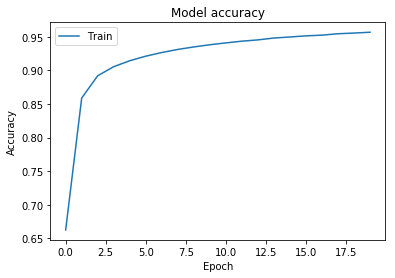

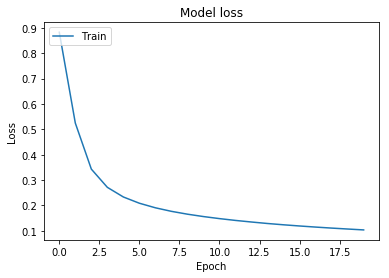

In [143]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()